# Pima Indians Diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

D:\ProgramFiles\Anaconda3\envs\torched\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\ProgramFiles\Anaconda3\envs\torched\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


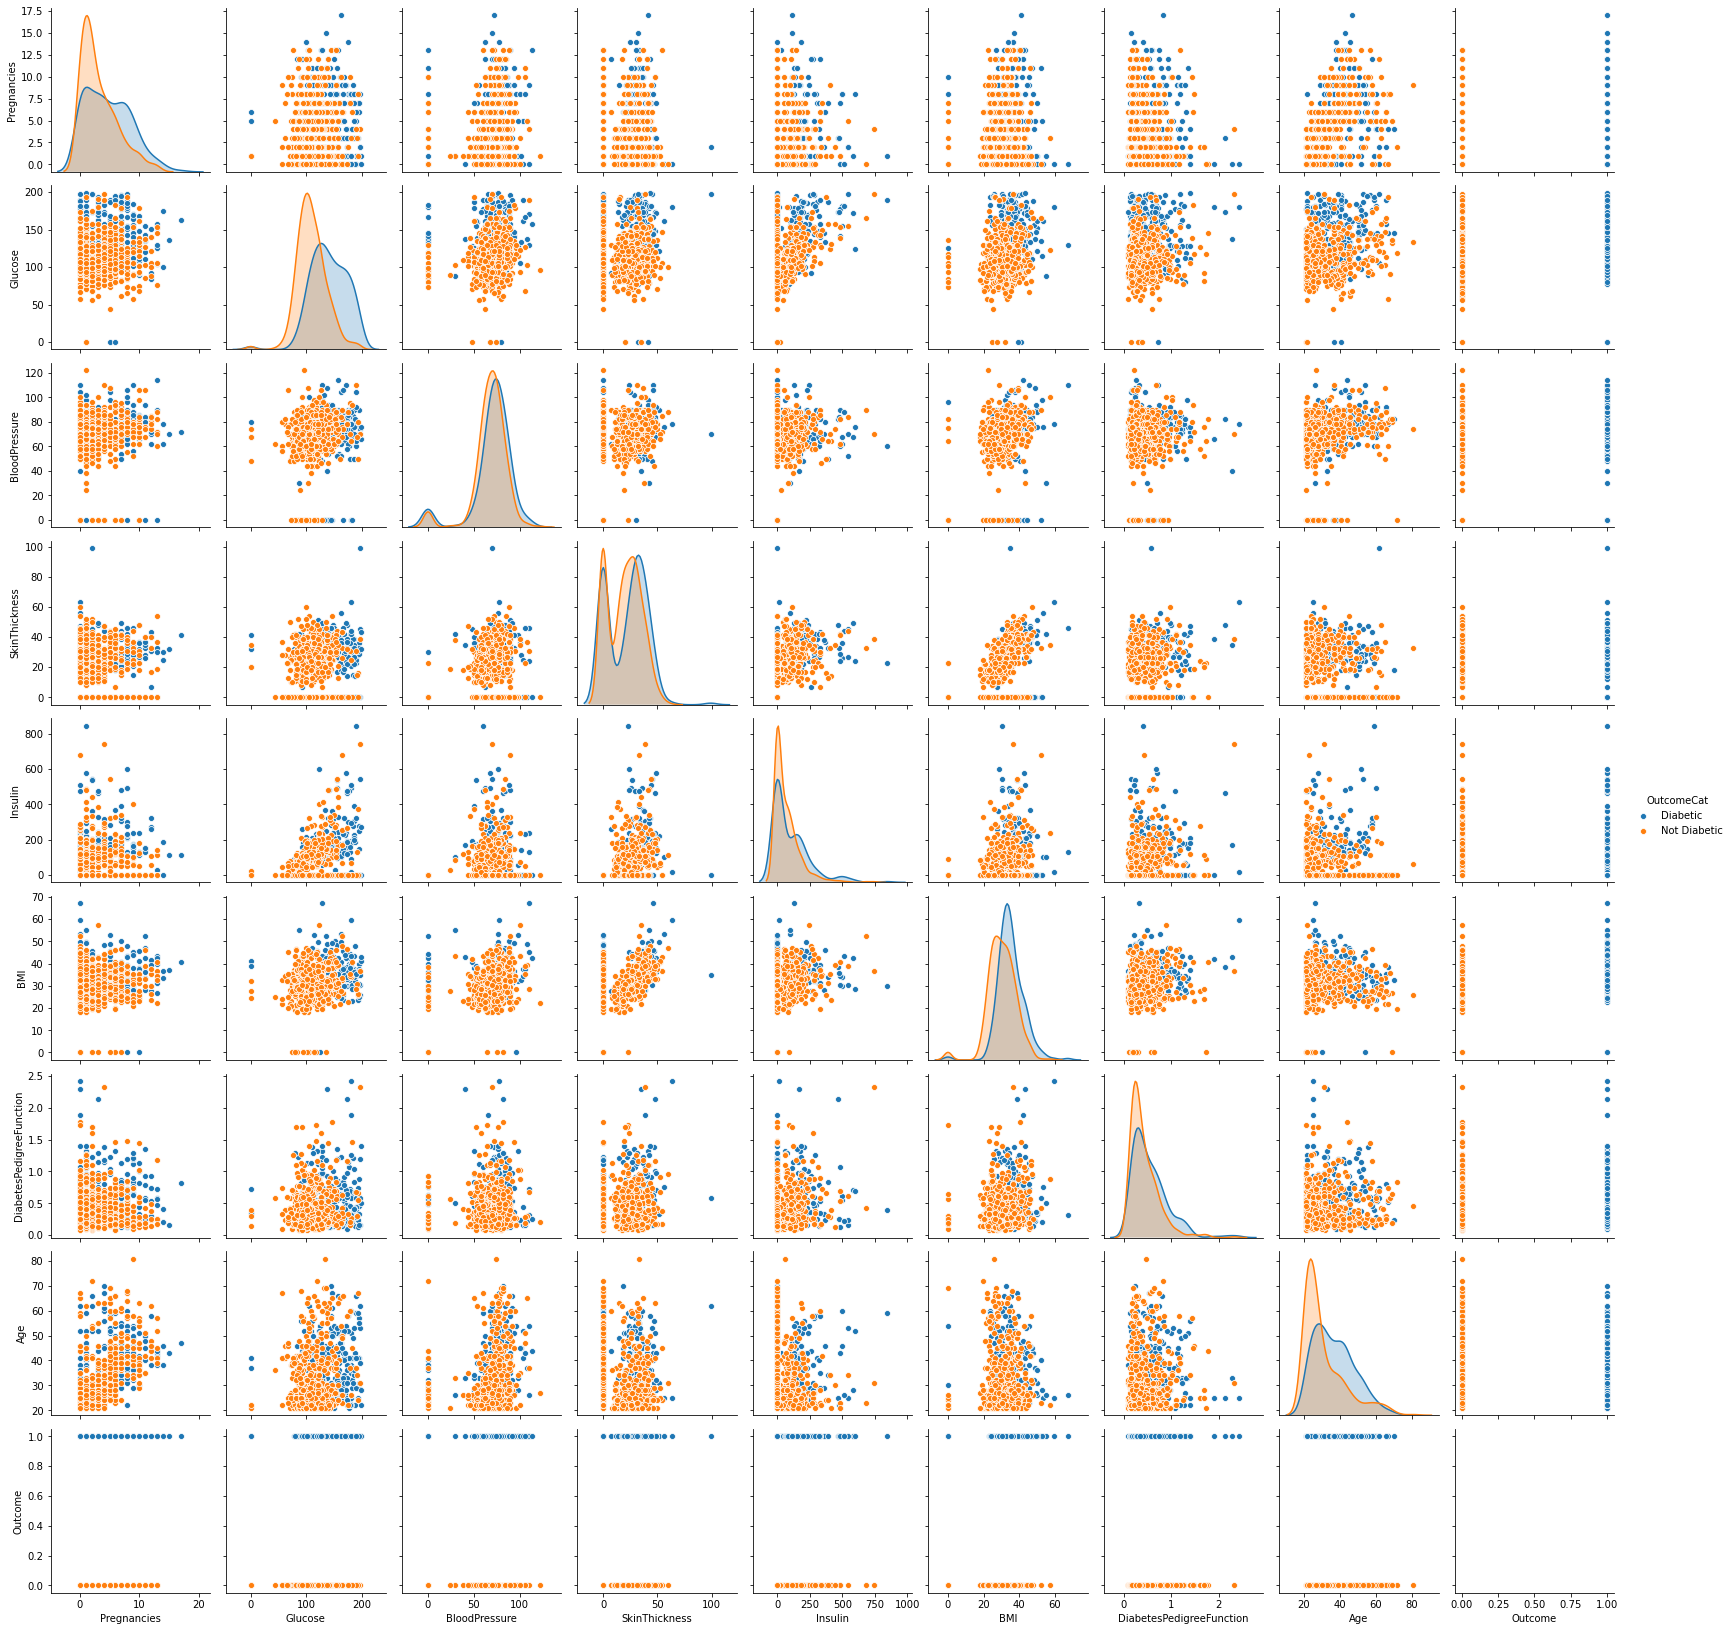

In [4]:
df['OutcomeCat'] = np.where(df.Outcome == 1,"Diabetic","Not Diabetic")
sns.pairplot(df,hue='OutcomeCat')

# Splitting into Train-Test data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome','OutcomeCat'],axis=1),df.Outcome,test_size  = 0.2, random_state=0)

# Torch Begins

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

## Model Architecture

In [9]:
class Model(nn.Module):
    def __init__(self,input_features = 8, hidden1 = 32, hidden2 = 32, hidden3 = 64,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.f_connected3 = nn.Linear(hidden2,hidden3)
        self.out = nn.Linear(hidden3,out_features)
    
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = F.relu(self.f_connected3(x))
        x = self.out(x)
        return x

In [10]:
torch.manual_seed(20)
model = Model()

In [11]:
model.parameters

<bound method Module.parameters of Model(
  (f_connected1): Linear(in_features=8, out_features=32, bias=True)
  (f_connected2): Linear(in_features=32, out_features=32, bias=True)
  (f_connected3): Linear(in_features=32, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)>

## Loss Function and Optimizer

In [12]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

## Training

In [13]:
epochs = 500
final_losses = []
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 0:
        print(f"Epoch {i} : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 10 : 0.6849793791770935
Epoch 20 : 0.6335940361022949
Epoch 30 : 0.6068130731582642
Epoch 40 : 0.5856299996376038
Epoch 50 : 0.5623442530632019
Epoch 60 : 0.5302359461784363
Epoch 70 : 0.49474310874938965
Epoch 80 : 0.4727064371109009
Epoch 90 : 0.462130606174469
Epoch 100 : 0.44120585918426514
Epoch 110 : 0.4178582727909088
Epoch 120 : 0.40022873878479004
Epoch 130 : 0.3823404014110565
Epoch 140 : 0.40444618463516235
Epoch 150 : 0.36917126178741455
Epoch 160 : 0.3591773509979248
Epoch 170 : 0.35814303159713745
Epoch 180 : 0.4082225561141968
Epoch 190 : 0.34121251106262207
Epoch 200 : 0.32011184096336365
Epoch 210 : 0.35957762598991394
Epoch 220 : 0.34854263067245483
Epoch 230 : 0.3100737929344177
Epoch 240 : 0.28963103890419006
Epoch 250 : 0.2767369747161865
Epoch 260 : 0.2689180374145508
Epoch 270 : 0.27109280228614807
Epoch 280 : 0.2678130865097046
Epoch 290 : 0.25915205478668213
Epoch 300 : 0.25704821944236755
Epoch 310 : 0.2466834932565689
Epoch 320 : 0.2345540076494217
Epoc

Text(0.5, 0, 'Epoch')

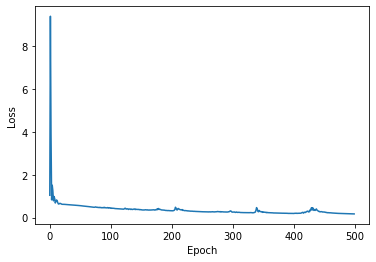

In [14]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Predictions

In [15]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[83, 24],
       [21, 26]], dtype=int64)

Text(33.0, 0.5, 'Predicted')

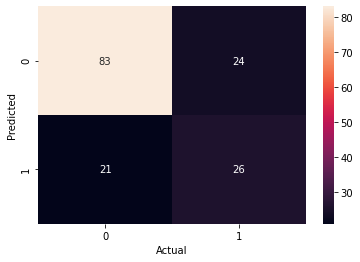

In [17]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')